In [1]:
%%capture
%pip install -r requirements.txt

# Load the data

In [2]:
from customer_focus_churn_rfm import load_data

data = load_data()
data

data.columns

Index(['order_id', 'customer_id', 'store_id', 'product_id', 'direction',
       'gross_price', 'price_reduction', 'purchase_datetime', 'product_class',
       'address_id', 'birthdate', 'gender', 'job_type', 'email_provider',
       'flag_phone_provided', 'flag_privacy', 'postal_code', 'district',
       'region', 'account_id', 'favorite_store', 'loyalty_type',
       'loyatlty_status', 'activation_date'],
      dtype='object')

The last purchase date in the dataset is: 2023-04-30 21:11:41


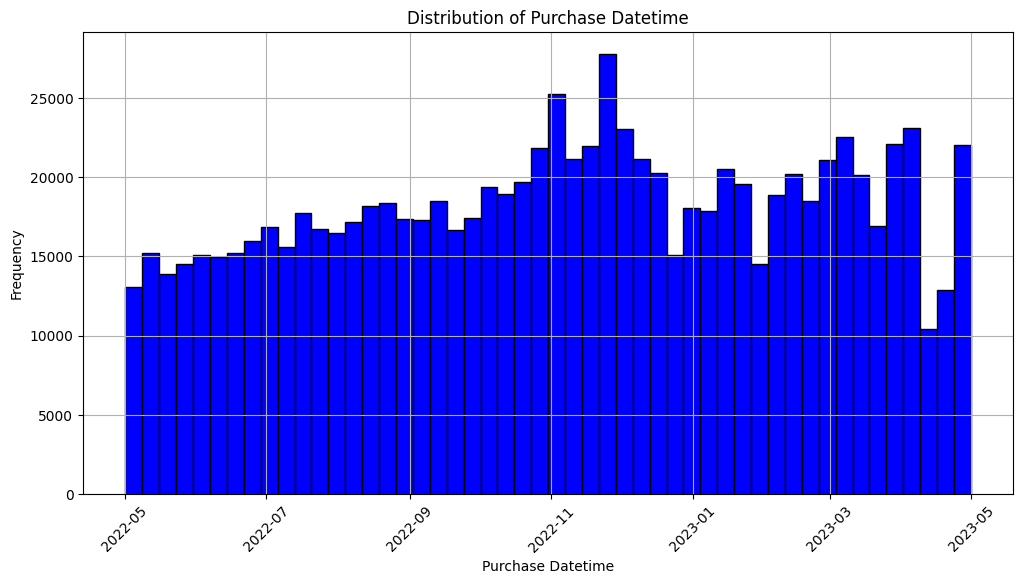

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert purchase_datetime to datetime if it's not already
data['purchase_datetime'] = pd.to_datetime(data['purchase_datetime'])
last_purchase_date = data['purchase_datetime'].max()
print(f"The last purchase date in the dataset is: {last_purchase_date}")

# Plot the purchase_datetime data
plt.figure(figsize=(12, 6))
plt.hist(data['purchase_datetime'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Purchase Datetime')
plt.xlabel('Purchase Datetime')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/tmp/ipykernel_14602/1241266858.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['purchase_diff'].fillna(data['last_purchase_diff'], inplace=True)


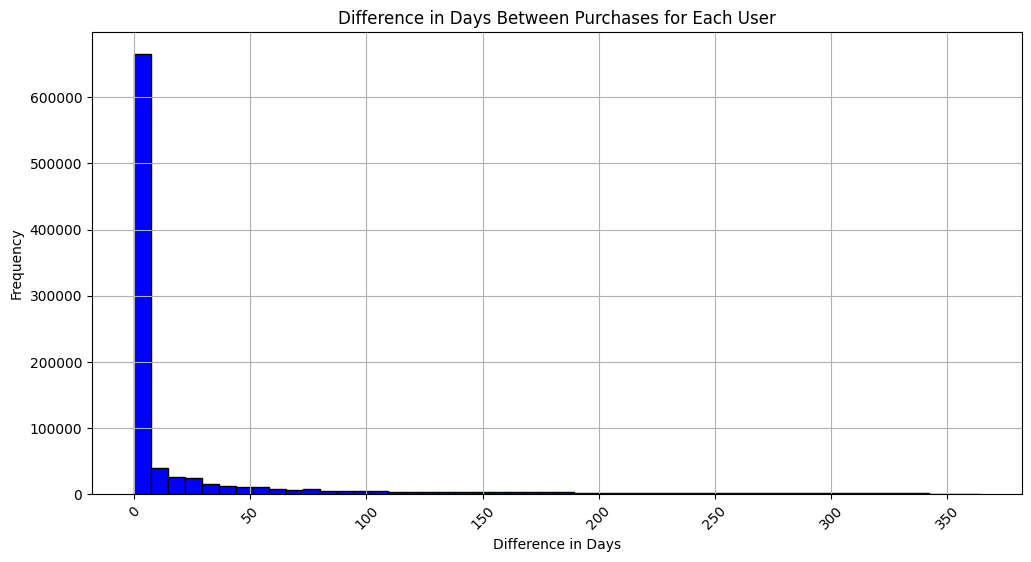

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'purchase_datetime' is in datetime format
data['purchase_datetime'] = pd.to_datetime(data['purchase_datetime'])

# Sort data by customer_id and purchase_datetime
data = data.sort_values(by=['customer_id', 'purchase_datetime'])

# Calculate the difference in days between consecutive purchases for each user
data['purchase_diff'] = data.groupby('customer_id')['purchase_datetime'].diff().dt.days

# Calculate the last day in the dataset
last_day = data['purchase_datetime'].max()

# Calculate the difference between the last purchase date and the last day in the dataset
last_purchase_diff = data.groupby('customer_id')['purchase_datetime'].max().apply(lambda x: (last_day - x).days)

# Merge the last purchase difference back to the original data
data = data.merge(last_purchase_diff.rename('last_purchase_diff'), on='customer_id')

# Fill NaN values in 'purchase_diff' with the 'last_purchase_diff'
data['purchase_diff'].fillna(data['last_purchase_diff'], inplace=True)

# Drop the 'last_purchase_diff' column as it's no longer needed
data.drop(columns=['last_purchase_diff'], inplace=True)

# Plot the differences using a histogram
plt.figure(figsize=(12, 6))
plt.hist(data['purchase_diff'], bins=50, color='blue', edgecolor='black')
plt.title('Difference in Days Between Purchases for Each User')
plt.xlabel('Difference in Days')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [5]:
# Filter rows where 'purchase_diff' is greater than 90 days
rows_with_large_diff = data[data['purchase_diff'] > 90]

# Display the filtered rows
rows_with_large_diff


,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,product_class,address_id,...,flag_privacy,postal_code,district,region,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date,purchase_diff
38,88b9dc81f8b601c78824ac62311a7eb4,30,49,35649740,1,3.10,0.31,2022-06-11 18:41:54,11,29,...,True,20028.0,MI,LOMBARDIA,351603,49,premium,1,2022-06-11,281.0
125,c14cd4c68ccabf1a47585bb4eced7ed4,60,49,35486626,1,49.98,0.00,2022-12-13 20:09:13,12,557043,...,True,21040.0,VA,LOMBARDIA,523699,1,standard,1,2022-09-13,138.0
127,54f1e18cc8825f7d2f40d0eafc833fe0,76,9,35411474,1,4.49,0.00,2023-03-08 19:23:27,11,73,...,True,62024.0,MC,MARCHE,222056,9,standard,1,2022-04-12,295.0
129,0bedd5ef545c4d82f2575f0263997a6b,86,15,33700716,1,0.20,0.00,2022-05-04 12:32:34,10,80,...,True,21019.0,VA,LOMBARDIA,152449,15,standard,1,2022-03-12,361.0
134,09d76e209b74b5d4ac16a1e8238f1189,95,49,30126292,1,1.55,0.00,2022-08-29 18:22:18,11,530831,...,False,21024.0,VA,LOMBARDIA,490641,49,business premium,1,2022-08-27,202.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860329,474a3498ae085224526844047ff32573,798840,42,34345136,1,19.35,0.00,2023-01-29 15:47:00,14,782077,...,True,133.0,RM,LAZIO,775662,42,standard,1,2023-01-29,91.0
860335,9f726eff853d6abf315c4a5b1e303c3f,798871,43,33817091,1,0.50,0.00,2023-01-29 15:21:25,10,782109,...,True,20138.0,MI,LOMBARDIA,775681,43,premium,1,2023-01-29,91.0
860346,7a846cbd69b931eec595e57287f5c689,798903,23,33972456,1,49.90,0.01,2023-01-29 15:23:28,8,782141,...,True,27058.0,PV,LOMBARDIA,775715,23,standard,1,2023-01-29,91.0
860351,94614180ea330aa52709278235ca5c3d,798944,27,36214080,1,0.60,0.00,2023-01-29 15:58:01,3,782182,...,True,37042.0,VR,VENETO,775761,27,standard,1,2023-01-29,91.0


# RFM Analysis

In [6]:
from customer_focus_churn_rfm import calculate_rfm

# The RFM table provides a summary of customer behavior:
# - Recency: The number of days since the customer's last purchase. Lower values indicate more recent activity.
# - Frequency: The average number of purchases made by the customer per month. 
#   This is calculated by scaling the total number of purchases to a monthly average, 
#   starting from the customer's first purchase.
# - Monetary: The total monetary value of the customer's purchases. Higher values indicate higher spending.

rfm = calculate_rfm(data)
rfm

,recency,monetary,frequency
customer_id,,,
23,69,476.04,7.600000
30,281,1191.24,2.000000
32,28,58.85,5.500000
48,0,1096.67,7.555556
50,70,28.75,2.000000
...,...,...,...
934484,0,39.10,5.000000
934581,0,33.60,1.000000
934620,0,21.98,2.000000


## Verify the frequency calculation for a specific customer

In [7]:
customer_id = 23  # Replace with a valid customer_id from your dataset
customer_rfm = rfm.loc[customer_id]
print(f"Customer ID: {customer_id}")
print(f"Recency: {customer_rfm['recency']}")
print(f"Monetary: {customer_rfm['monetary']}")
print(f"Frequency: {customer_rfm['frequency']}")

Customer ID: 23
Recency: 69.0
Monetary: 476.04
Frequency: 7.6


/tmp/ipykernel_14602/1985313719.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['purchase_datetime'] = pd.to_datetime(customer_data['purchase_datetime'])


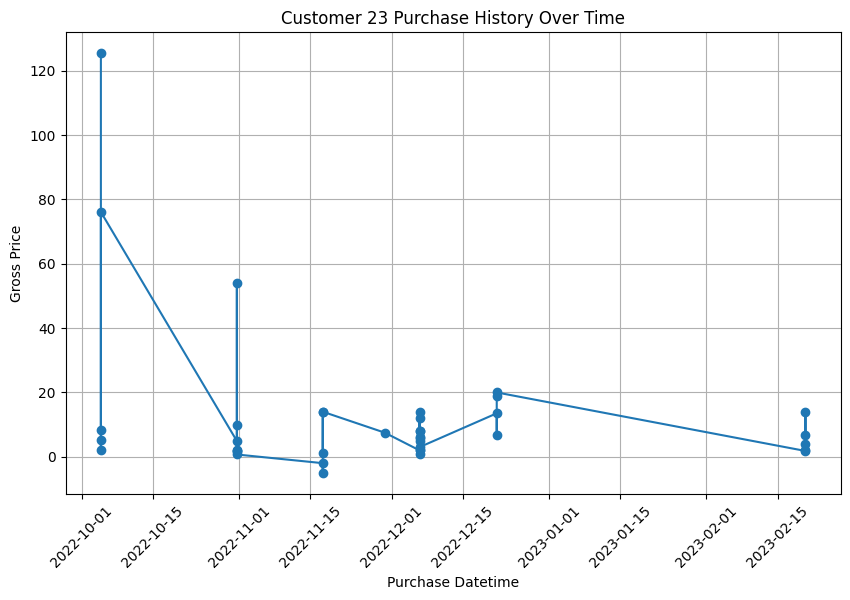

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter data for the specific customer
customer_data = data[data['customer_id'] == 23]

# Convert purchase_datetime to datetime format
customer_data['purchase_datetime'] = pd.to_datetime(customer_data['purchase_datetime'])

# Sort data by purchase_datetime
customer_data = customer_data.sort_values(by='purchase_datetime')

# Plot the purchase history over time
plt.figure(figsize=(10, 6))
plt.plot(customer_data['purchase_datetime'], customer_data['gross_price'], marker='o', linestyle='-')
plt.title('Customer 23 Purchase History Over Time')
plt.xlabel('Purchase Datetime')
plt.ylabel('Gross Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Churn Analysis

In [10]:
from customer_focus_churn_rfm import prepare_features, prepare_features_no_window, train_churn_model, load_data, calculate_rfm, create_sliding_window_churn_label
from datetime import timedelta

print("Loading data...")
data = load_data()
rfm = calculate_rfm(data)

print("Creating sliding window churn labels...")
# Create sliding window churn labels
churn_labels = create_sliding_window_churn_label(data)

print("Preparing features...")
# Prepare features
features_df = prepare_features(data, churn_labels)

print("Training model...")
# Train the model
model, feature_names, (X_train, X_test, y_train, y_test), scaler = train_churn_model(features_df)

# filter the data for the last 90 days
last_window_data = data[(data['purchase_datetime'] >= data['purchase_datetime'].max() - timedelta(days=90))]

prepared_data = prepare_features_no_window(last_window_data)

prepared_data['churn_probability'] = model.predict_proba(scaler.transform(prepared_data[feature_names]))[:, 1]

Loading data...
Creating sliding window churn labels...
Preparing features...


/teamspace/studios/this_studio/marketing_project/customer_focus_churn_rfm.py:221: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  window_data['month'] = window_data['purchase_datetime'].dt.to_period('M')
/teamspace/studios/this_studio/marketing_project/customer_focus_churn_rfm.py:221: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  window_data['month'] = window_data['purchase_datetime'].dt.to_period('M')
/teamspace/studios/this_studio/marketing_project/customer_focus_churn_rfm.py:221: SettingWithCopyWarning: 
A

Training model...


Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.20      0.27     19209
           1       0.77      0.90      0.83     57802

    accuracy                           0.73     77011
   macro avg       0.59      0.55      0.55     77011
weighted avg       0.68      0.73      0.69     77011


Confusion Matrix:
[[ 3803 15406]
 [ 5588 52214]]

ROC AUC Score: 0.6167


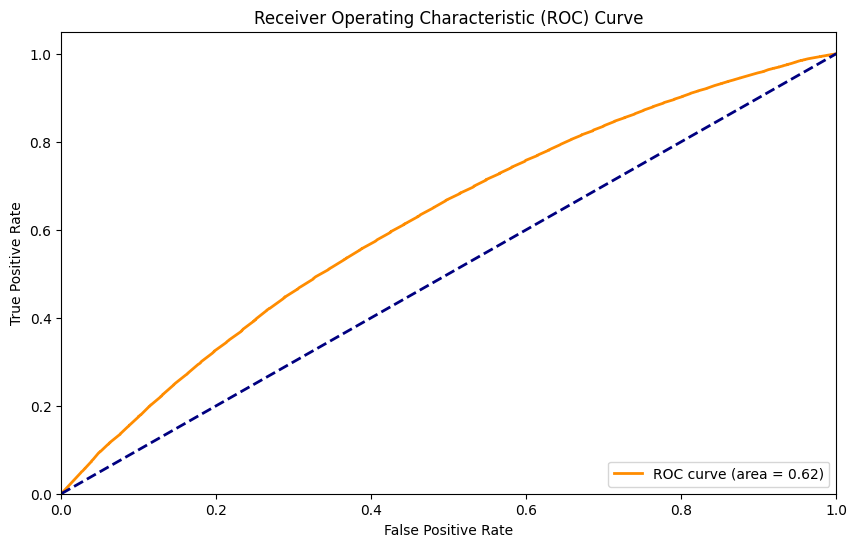

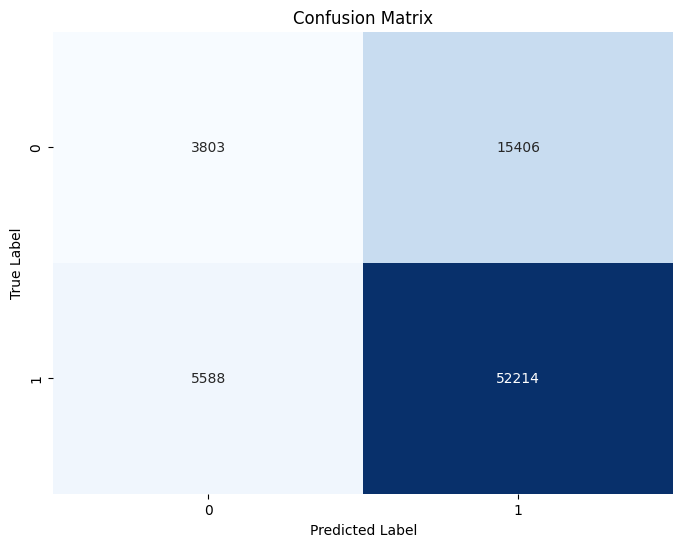

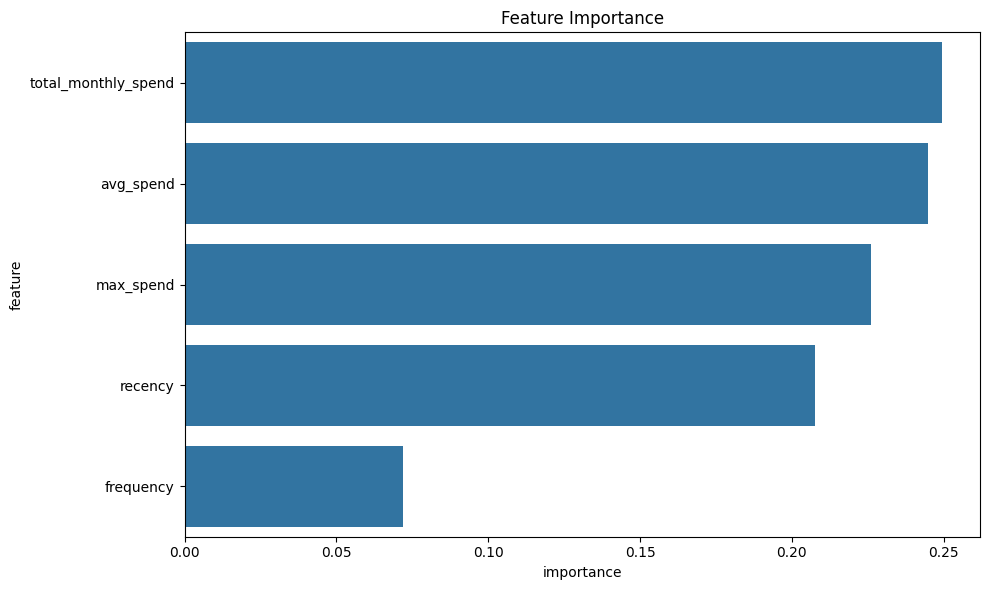

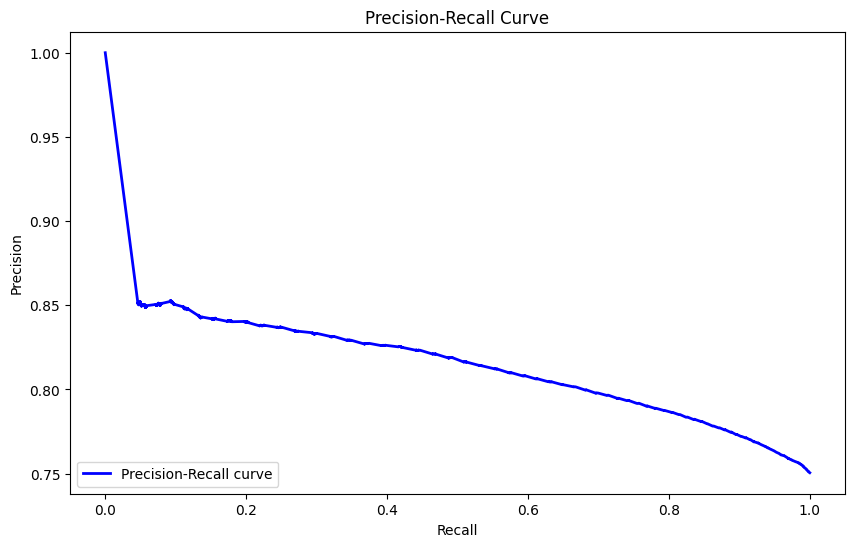

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import pandas as pd
from customer_focus_churn_rfm import evaluate_model

evaluation_results = evaluate_model(model, X_test, y_test)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
conf_matrix = evaluation_results['confusion_matrix']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot Feature Importance
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


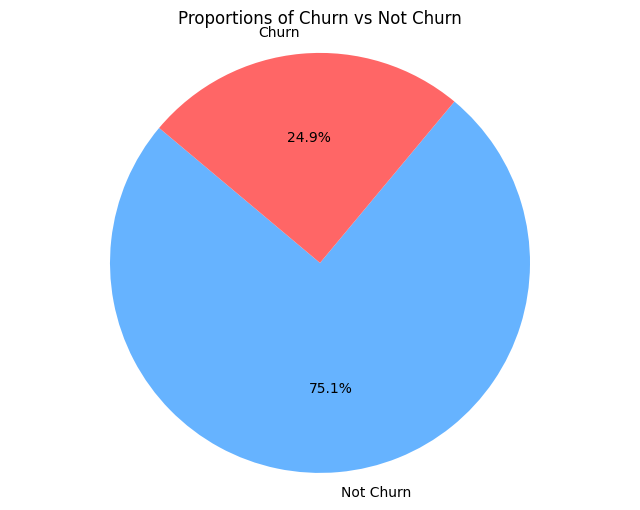

In [35]:
import matplotlib.pyplot as plt
# Plot the proportions between churn and not churn

# Calculate the proportions
churn_proportions = churn_labels['churned'].value_counts(normalize=True)

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(churn_proportions, labels=['Not Churn', 'Churn'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff6666'])
plt.title('Proportions of Churn vs Not Churn')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
plt.show()


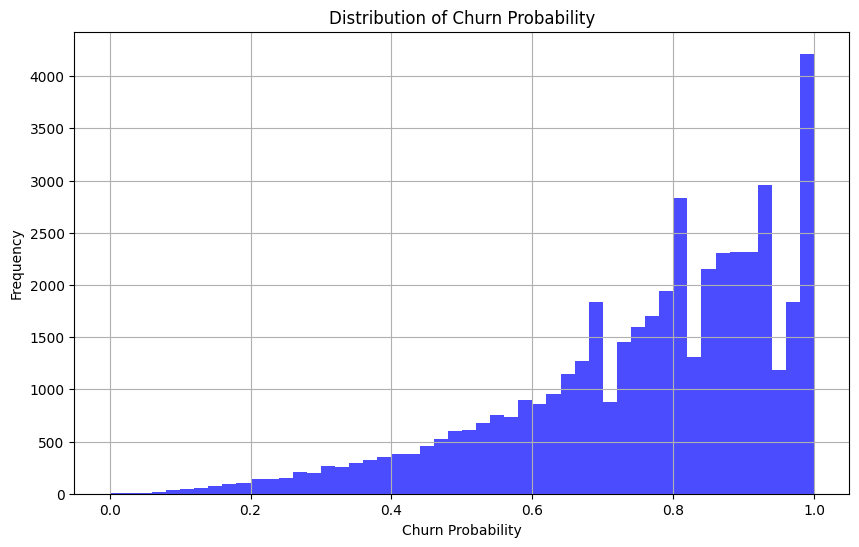

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_churn_probability(data: pd.DataFrame) -> None:
    """
    Plots the churn probability for the given data.

    Parameters
    ----------
    data : pd.DataFrame
        The DataFrame containing the churn probability and other features.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(data['churn_probability'], bins=50, color='blue', alpha=0.7)
    plt.xlabel('Churn Probability')
    plt.ylabel('Frequency')
    plt.title('Distribution of Churn Probability')
    plt.grid(True)
    plt.show()

# Plot churn probability
plot_churn_probability(prepared_data)


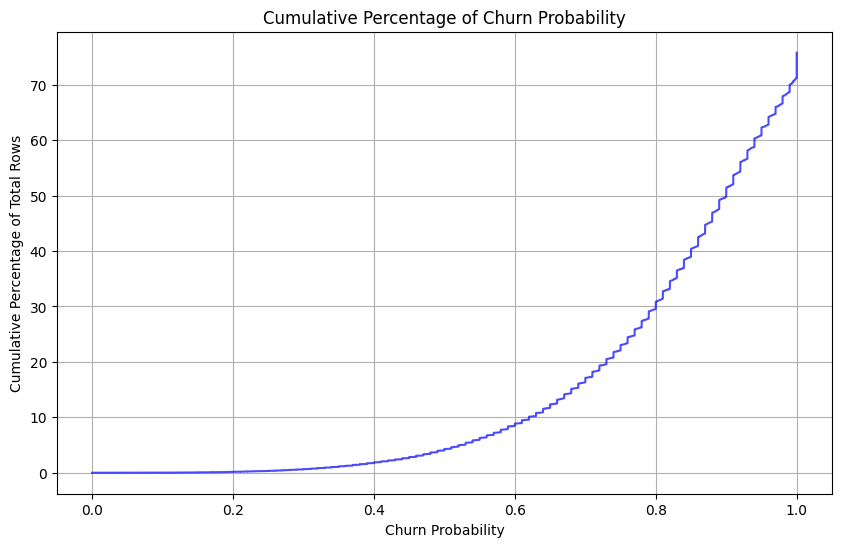

In [25]:
import matplotlib.pyplot as plt

def plot_cumulative_churn_probability(data: pd.DataFrame) -> None:
    """
    Plots the cumulative sum of the churn probability as a percentage of the total number of rows for the given data.

    Parameters
    ----------
    data : pd.DataFrame
        The DataFrame containing the churn probability and other features.
    """
    plt.figure(figsize=(10, 6))
    data_sorted = data.sort_values('churn_probability')
    cumulative_sum = data_sorted['churn_probability'].cumsum()
    total_rows = len(data)
    cumulative_percentage = (cumulative_sum / total_rows) * 100
    plt.plot(data_sorted['churn_probability'], cumulative_percentage, color='blue', alpha=0.7)
    plt.xlabel('Churn Probability')
    plt.ylabel('Cumulative Percentage of Total Rows')
    plt.title('Cumulative Percentage of Churn Probability')
    plt.grid(True)
    plt.show()

# Plot cumulative churn probability
plot_cumulative_churn_probability(prepared_data)


In [ ]:
from customer_focus_churn_rfm import identify_high_value_customers

high_value_at_risk = identify_high_value_customers(prepared_data, model, feature_names, scaler)

In [19]:
high_value_at_risk[(high_value_at_risk['RFM_cluster'] == 'High') & (high_value_at_risk['churn_probability'] > 0.8)]

,customer_id,frequency,total_monthly_spend,avg_spend,max_spend,recency,churn_probability,RFM_cluster
27542,644693,1,129.90,129.900000,129.90,78,1.000000,High
27158,636692,1,460.00,460.000000,460.00,85,1.000000,High
23061,546143,1,139.00,139.000000,139.00,61,1.000000,High
3622,60241,1,241.38,241.380000,241.38,86,1.000000,High
22994,544158,1,83.70,83.700000,83.70,63,1.000000,High
...,...,...,...,...,...,...,...,...
34489,771672,11,162.46,14.769091,83.88,58,0.810000,High
29103,675790,5,502.67,100.534000,448.07,73,0.810000,High
40018,837330,2,101.50,50.750000,99.00,65,0.805000,High
33853,762404,1,95.88,95.880000,95.88,83,0.805000,High


In [31]:
# Calculate the total number of rows
total_rows = len(high_value_at_risk)

# Filter out rows where RFM_cluster is different from 'High'
filtered_rfm_cluster = high_value_at_risk[high_value_at_risk['RFM_cluster'] != 'High']
num_filtered_rfm_cluster = len(filtered_rfm_cluster)
percentage_filtered_rfm_cluster = (num_filtered_rfm_cluster / total_rows) * 100

# Filter out rows where churn_probability is less than 0.8
filtered_churn_probability = high_value_at_risk[high_value_at_risk['churn_probability'] < 0.8]
num_filtered_churn_probability = len(filtered_churn_probability)
percentage_filtered_churn_probability = (num_filtered_churn_probability / total_rows) * 100

# Filter out rows where both conditions are verified
filtered_both_conditions = high_value_at_risk[(high_value_at_risk['RFM_cluster'] != 'High') | (high_value_at_risk['churn_probability'] < 0.8)]
num_filtered_both_conditions = len(filtered_both_conditions)
percentage_filtered_both_conditions = (num_filtered_both_conditions / total_rows) * 100

# Calculate the total number of rows with both conditions verified
num_both_conditions_verified = total_rows - num_filtered_both_conditions
percentage_both_conditions_verified = (num_both_conditions_verified / total_rows) * 100

# Print the results
print(f"Number of rows filtered out for RFM_cluster different from 'High': {num_filtered_rfm_cluster} ({percentage_filtered_rfm_cluster:.2f}%)")
print(f"Number of rows filtered out for churn_probability less than 0.8: {num_filtered_churn_probability} ({percentage_filtered_churn_probability:.2f}%)")
# print(f"Number of rows filtered out for both conditions: {num_filtered_both_conditions} ({percentage_filtered_both_conditions:.2f}%)")

# Print the result
print(f"Number of High-value customers to target with retention campaign: {num_both_conditions_verified} ({percentage_both_conditions_verified:.2f}%)")

Number of rows filtered out for RFM_cluster different from 'High': 3879 (66.67%)
Number of rows filtered out for churn_probability less than 0.8: 1771 (30.44%)
Number of High-value customers to target with retention campaign: 1593 (27.38%)
